In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carichiamo il file Excel per vedere il contenuto
file_path = '/Users/cami/Documents/GitHub/pyesm_thesis/tesi_camilla/casi_MarioU/Res_dataframes.xlsx'
excel_data = pd.ExcelFile(file_path)

df = pd.read_excel(excel_data, sheet_name='Sheet1')

df_clean = df.copy()
df_clean = df_clean.drop([0, 1])     # Rimuoviamo la riga delle città e degli utenti
df_clean.set_index('house', inplace=True)

In [4]:
# Selezioniamo solo i dati per EE e NG
data_electricity = df_clean.loc['Q_EE']
data_gas = df_clean.loc['Q_NG']

# Rinominiamo le colonne per chiarezza
data_electricity.columns = ['Electricity']
data_gas.columns = ['Gas']

# Creiamo un DataFrame congiunto per il grafico
data_combined = pd.concat([data_electricity, data_gas], axis=1)
data_combined.reset_index(inplace=True)
data_combined.columns = ['User', 'Electricity', 'Gas']

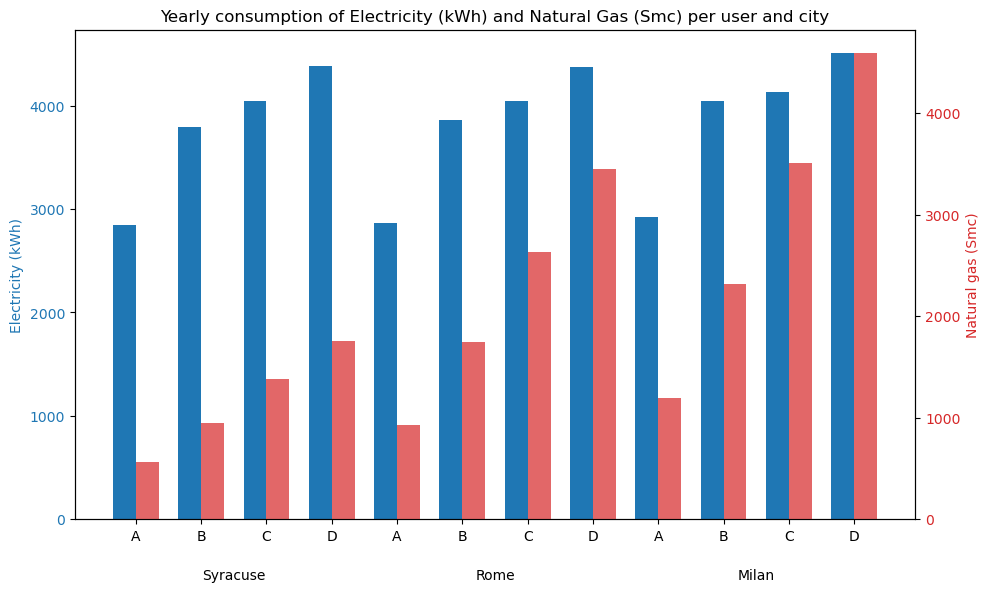

In [5]:
names=[]
for s in range(3):
    for i in ['A', 'B', 'C', 'D']:
        names.append(i)
data_combined['User'] = names
# Definiamo la posizione delle barre
x = np.arange(len(data_combined['User']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico per l'elettricità (asse sinistro)
rects1 = ax1.bar(x - width/2, data_combined['Electricity'], width, label='Electricity', color='#1f77b4')
ax1.set_ylabel('Electricity (kWh)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Asse destro per il gas
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, data_combined['Gas'], width, label='Gas', color='#d62728', alpha=0.7)
ax2.set_ylabel('Natural gas (Smc)', color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(data_combined['User'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.1, city, ha='center', va='top', transform=ax1.get_xaxis_transform())


# Titolo e layout
plt.title('Yearly consumption of Electricity (kWh) and Natural Gas (Smc) per user and city')
fig.tight_layout()

# Mostriamo il grafico
plt.show()


In [42]:
# # Selezioniamo solo i dati per opex e capex
# opex = df_clean.loc['opex']
# capex = df_clean.loc['capex']
# opex.columns = ['opex']
# capex.columns = ['capex']
#data_combined = pd.concat([opex, capex], axis=1)
#data_combined.reset_index(inplace=True)
#data_combined.columns = ['User', 'Opex', 'Capex']

#Comparing baseline with incentive
dfcost = pd.DataFrame(columns=['User', 'OpexEE','OpexNG','OpexFix','FixEE','FixNG', 'Capex'])
short_city=['Si','Ro','Mi']
long_city=['Siracusa','Roma','Milano']

for c in range(3):
    city=short_city[c]
    city_extended=long_city[c]
    csv_folder=f'{city_extended}/Results/Base_Results_csv'
    cost_op_tot_all = pd.read_csv(f'{csv_folder}/cost_op_tot.csv',usecols=lambda column: column != 'id')
    cost_inv_tot_all = pd.read_csv(f'{csv_folder}/cost_inv_tot.csv',usecols=lambda column: column != 'id')
    cost_op_year_all = pd.read_csv(f'{csv_folder}/cost_op_year.csv',usecols=lambda column: column != 'id')
    active_techs_all = pd.read_csv(f'{csv_folder}/active_techs.csv',usecols=lambda column: column != 'id')
    cap_tot_all = pd.read_csv(f'{csv_folder}/cap_tot.csv',usecols=lambda column: column != 'id')
    new_units_all = pd.read_csv(f'{csv_folder}/new_units.csv',usecols=lambda column: column != 'id')
    cap_new_all = pd.read_csv(f'{csv_folder}/cap_new.csv',usecols=lambda column: column != 'id')
    CO2_tot_all = pd.read_csv(f'{csv_folder}/CO2_tot.csv',usecols=lambda column: column != 'id')
    CO2_act_all = pd.read_csv(f'{csv_folder}/CO2_act.csv',usecols=lambda column: column != 'id')
    insulation_all = pd.read_csv(f'{csv_folder}/insulation.csv',usecols=lambda column: column != 'id')
    X_all = pd.read_csv(f'{csv_folder}/X.csv',usecols=lambda column: column != 'id')
    Xt_all = pd.read_csv(f'{csv_folder}/X_t.csv',usecols=lambda column: column != 'id')
    Q_all = pd.read_csv(f'{csv_folder}/Q.csv',usecols=lambda column: column != 'id')
    SOC_all = pd.read_csv(f'{csv_folder}/SOC.csv',usecols=lambda column: column != 'id')
    # Importing exogenous data from data_input excel
    excel_file = f'{city_extended}/input_data/input_data_base.xlsx'
    Y_all = pd.read_excel(excel_file, sheet_name='Y',usecols=lambda column: column != 'id')
    cost_cap = pd.read_excel(excel_file, sheet_name='cost_cap',usecols=lambda column: column != 'id')
    cost_period = pd.read_excel(excel_file, sheet_name='cost_period',usecols=lambda column: column != 'id')
    cost_inv_all = pd.read_excel(excel_file, sheet_name='cost_inv',usecols=lambda column: column != 'id')
    disc_frac_pd = pd.read_excel(excel_file, sheet_name='disc_frac',usecols=lambda column: column != 'id')
    disc_frac=disc_frac_pd.at[0,'values']
    TI_cost_all = pd.read_excel(excel_file, sheet_name='TI_cost',usecols=lambda column: column != 'id')
    DPT = pd.read_excel(excel_file, sheet_name='days_per_type',usecols=lambda column: column != 'id')
    u=pd.read_excel(excel_file, sheet_name='u',usecols=lambda column: column != 'id')

    for user in ['A','B','C','D']:
        scenario=f'{city_extended} {user}'
        user_name=f'User{user}'
        #Selecting for specific user (letter)
        cost_op_tot=cost_op_tot_all.loc[cost_op_tot_all['s_names'] == f'User{user}']
        cost_inv_tot=cost_inv_tot_all.loc[cost_inv_tot_all['s_names'] == f'User{user}']
        cost_op_year=cost_op_year_all.loc[cost_op_year_all['s_names'] == f'User{user}']
        active_techs=active_techs_all.loc[active_techs_all['s_names'] == f'User{user}']
        cap_tot=cap_tot_all.loc[cap_tot_all['s_names'] == f'User{user}']
        new_units=new_units_all.loc[new_units_all['s_names'] == f'User{user}']
        cap_new=cap_new_all.loc[cap_new_all['s_names'] == f'User{user}']
        CO2_tot=CO2_tot_all.loc[CO2_tot_all['s_names'] == f'User{user}']
        CO2_act=CO2_act_all.loc[CO2_act_all['s_names'] == f'User{user}']
        insulation=insulation_all.loc[insulation_all['s_names'] == f'User{user}']
        X=X_all.loc[X_all['s_names'] == f'User{user}']
        Xt=Xt_all.loc[Xt_all['s_names'] == f'User{user}']
        Q=Q_all.loc[Q_all['s_names'] == f'User{user}']
        SOC=SOC_all.loc[SOC_all['s_names'] == f'User{user}']
        Y=Y_all.loc[Y_all['s_names'] == f'User{user}']
        cost_inv=cost_inv_all.loc[cost_inv_all['s_names'] == f'User{user}']
        TI_cost=TI_cost_all.loc[TI_cost_all['s_names'] == f'User{user}']

        for df in [cost_op_tot, active_techs, cap_tot, new_units, cap_new, CO2_tot, CO2_act, insulation, X, Xt, Q, SOC, Y, cost_inv, TI_cost]:
            df.reset_index(drop=True, inplace=True)

        #Definitions for time
        seasons = ['wi', 'mc', 'mw', 'su']
        season_names = {'wi': 'Winter', 'mc': 'Mid-cold', 'mw': 'Mid-warm', 'su': 'Summer'}

        #Isolate peak
        peak_Y= Y[Y['th_names'] == 'peak']
        Y=Y[Y['th_names'] != 'peak']
        peak_Q= Q[Q['th_names'] == 'peak']
        Q=Q[Q['th_names'] != 'peak']
        peak_X=X[X['th_names'] == 'peak']
        X=X[X['th_names'] != 'peak']
        peak_Xt=Xt[Xt['th_names'] == 'peak']
        Xt=Xt[Xt['th_names'] != 'peak']
        SOC=SOC[SOC['th_names'] != 'peak']
        DPT=DPT[DPT['days_names'] != 'peak']

        for db in [Y,Q,X,Xt,SOC]:
            db.index=range(len(db))
            db.loc[:,'season']=db['th_names'].str[4:6]
            db['hour'] = db['th_names'].str[1:3].astype(int)
            db['day'] = db['th_names'].str[-2:].astype(int)
            db['time'] = (db['day'] - 1) * 24 + db['hour']

        def compute_daily(df):
            #Group by day and season
            df = df.groupby(['day', 'season']).agg(consumption=('values', 'sum')).reset_index()
            #Fix the order
            season_order = ['wi', 'mc', 'mw', 'su']
            df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
            df_sorted = df.sort_values(by=['season', 'day'])
            df_sorted.index = range(len(df_sorted))
            return df_sorted

        #Gas national grid
        EE_fixed=cost_period[cost_period['t_names']=='National Grid EE']['values'].to_numpy()[0]+cost_cap[cost_cap['t_names']=='National Grid EE']['values'].to_numpy()[0]*cap_tot[cap_tot['t_names']=='National Grid EE']['values'].to_numpy()[0]*2
        NG_fixed=cost_period[cost_period['t_names']=='Gas National Grid']['values'].to_numpy()[0]

        dfcost.loc[scenario]={
            'User':user,
            'OpexEE': cost_op_tot[cost_op_tot['a_names']=='National Grid import']['values'].to_numpy()[0],
            'OpexNG': cost_op_tot[cost_op_tot['a_names']=='Natural Gas supply grid']['values'].to_numpy()[0],
            'OpexFix': cost_period[cost_period['t_names']=='Gas Boiler']['values'].to_numpy()[0],
            'FixEE': EE_fixed,
            'FixNG': NG_fixed,
            'Capex': cost_inv_tot['values'].to_numpy()[0]
        }

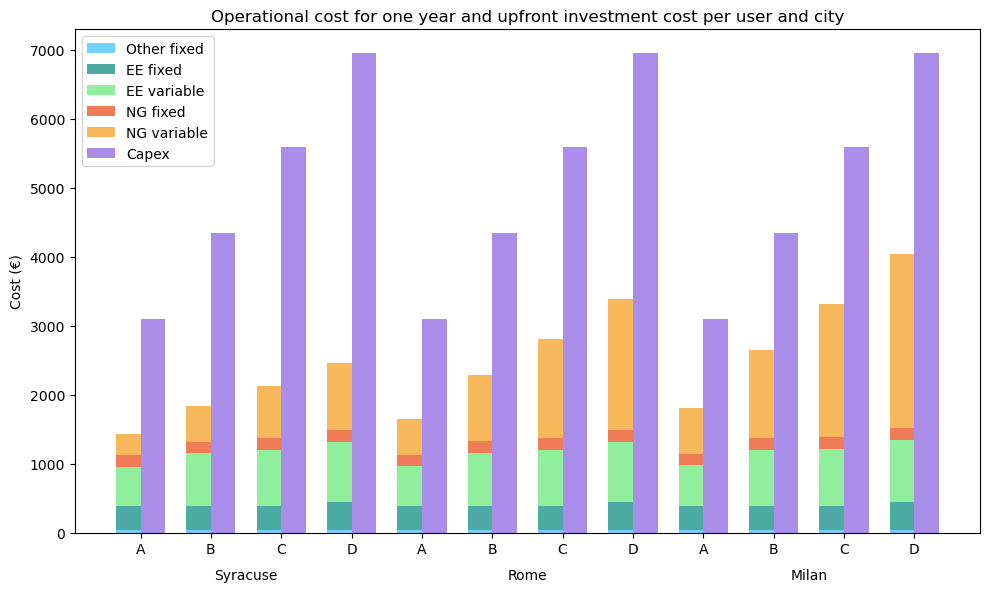

In [43]:
names=[]
for s in range(3):
    for i in ['A', 'B', 'C', 'D']:
        names.append(i)

# Definiamo la posizione delle barre
x = np.arange(len(dfcost['User']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre per opex e capex
rects1 = ax.bar(x - width/2, dfcost['OpexFix'], width, label='Other fixed', color='#70D2FB')
rects2 = ax.bar(x - width/2, dfcost['FixEE'], width, bottom=dfcost['OpexFix'], label='EE fixed', color='#4BAAA1')
rects3 = ax.bar(x - width/2, dfcost['OpexEE'], width, bottom=dfcost['OpexFix']+dfcost['FixEE'],label='EE variable', color='#8FEF9D')
rects4 = ax.bar(x - width/2, dfcost['FixNG'], width, bottom=dfcost['OpexEE']+dfcost['OpexFix']+dfcost['FixEE'], label='NG fixed', color='#EF7C57')
rects5 = ax.bar(x - width/2, dfcost['OpexNG'], width, bottom=dfcost['OpexEE']+dfcost['OpexFix']+dfcost['FixEE']+dfcost['FixNG'], label='NG variable', color='#F6B85A')
rects6 = ax.bar(x + width/2, dfcost['Capex'], width, label='Capex', color='#AA8DE9')

# Aggiungiamo le etichette degli utenti e l'asse y in €
ax.set_ylabel('Cost (€)')
ax.set_xticks(x)
ax.set_xticklabels(dfcost['User'])


# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())

ax.legend()
# Titolo e layout
plt.title('Operational cost for one year and upfront investment cost per user and city')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

In [2]:
#Taking data for graphs
short_city=['Si','Ro','Mi']
long_city=['Siracusa','Roma','Milano']
df_graph=pd.DataFrame(columns=['users','YEE','AC','Boiler','Cooking'])
df_CO2_act=pd.DataFrame(columns=['users','EE','gas'])
for c in range(3):
    city=short_city[c]
    city_extended=long_city[c]
    csv_folder=f'{city_extended}/Results/Base_Results_csv'
    cost_op_tot_all = pd.read_csv(f'{csv_folder}/cost_op_tot.csv',usecols=lambda column: column != 'id')
    active_techs_all = pd.read_csv(f'{csv_folder}/active_techs.csv',usecols=lambda column: column != 'id')
    cap_tot_all = pd.read_csv(f'{csv_folder}/cap_tot.csv',usecols=lambda column: column != 'id')
    new_units_all = pd.read_csv(f'{csv_folder}/new_units.csv',usecols=lambda column: column != 'id')
    cap_new_all = pd.read_csv(f'{csv_folder}/cap_new.csv',usecols=lambda column: column != 'id')
    CO2_tot_all = pd.read_csv(f'{csv_folder}/CO2_tot.csv',usecols=lambda column: column != 'id')
    CO2_act_all = pd.read_csv(f'{csv_folder}/CO2_act.csv',usecols=lambda column: column != 'id')
    insulation_all = pd.read_csv(f'{csv_folder}/insulation.csv',usecols=lambda column: column != 'id')
    X_all = pd.read_csv(f'{csv_folder}/X.csv',usecols=lambda column: column != 'id')
    Xt_all = pd.read_csv(f'{csv_folder}/X_t.csv',usecols=lambda column: column != 'id')
    Q_all = pd.read_csv(f'{csv_folder}/Q.csv',usecols=lambda column: column != 'id')
    SOC_all = pd.read_csv(f'{csv_folder}/SOC.csv',usecols=lambda column: column != 'id')
    # Importing exogenous data from data_input excel
    excel_file = f'{city_extended}/input_data/input_data_base.xlsx'
    Y_all = pd.read_excel(excel_file, sheet_name='Y',usecols=lambda column: column != 'id')
    cost_cap = pd.read_excel(excel_file, sheet_name='cost_cap',usecols=lambda column: column != 'id')
    cost_period = pd.read_excel(excel_file, sheet_name='cost_period',usecols=lambda column: column != 'id')
    cost_inv_all = pd.read_excel(excel_file, sheet_name='cost_inv',usecols=lambda column: column != 'id')
    disc_frac_pd = pd.read_excel(excel_file, sheet_name='disc_frac',usecols=lambda column: column != 'id')
    disc_frac=disc_frac_pd.at[0,'values']
    TI_cost_all = pd.read_excel(excel_file, sheet_name='TI_cost',usecols=lambda column: column != 'id')
    DPT = pd.read_excel(excel_file, sheet_name='days_per_type',usecols=lambda column: column != 'id')
    u=pd.read_excel(excel_file, sheet_name='u',usecols=lambda column: column != 'id')

    for user in ['A','B','C','D']:
        scenario=f'{city_extended} {user}'
        user_name=f'User{user}'
        #Selecting for specific user (letter)
        cost_op_tot=cost_op_tot_all.loc[cost_op_tot_all['s_names'] == f'User{user}']
        active_techs=active_techs_all.loc[active_techs_all['s_names'] == f'User{user}']
        cap_tot=cap_tot_all.loc[cap_tot_all['s_names'] == f'User{user}']
        new_units=new_units_all.loc[new_units_all['s_names'] == f'User{user}']
        cap_new=cap_new_all.loc[cap_new_all['s_names'] == f'User{user}']
        CO2_tot=CO2_tot_all.loc[CO2_tot_all['s_names'] == f'User{user}']
        CO2_act=CO2_act_all.loc[CO2_act_all['s_names'] == f'User{user}']
        insulation=insulation_all.loc[insulation_all['s_names'] == f'User{user}']
        X=X_all.loc[X_all['s_names'] == f'User{user}']
        Xt=Xt_all.loc[Xt_all['s_names'] == f'User{user}']
        Q=Q_all.loc[Q_all['s_names'] == f'User{user}']
        SOC=SOC_all.loc[SOC_all['s_names'] == f'User{user}']
        Y=Y_all.loc[Y_all['s_names'] == f'User{user}']
        cost_inv=cost_inv_all.loc[cost_inv_all['s_names'] == f'User{user}']
        TI_cost=TI_cost_all.loc[TI_cost_all['s_names'] == f'User{user}']

        for df in [cost_op_tot, active_techs, cap_tot, new_units, cap_new, CO2_tot, CO2_act, insulation, X, Xt, Q, SOC, Y, cost_inv, TI_cost]:
            df.reset_index(drop=True, inplace=True)

        #Definitions for time
        seasons = ['wi', 'mc', 'mw', 'su']
        season_names = {'wi': 'Winter', 'mc': 'Mid-cold', 'mw': 'Mid-warm', 'su': 'Summer'}

        #Isolate peak
        peak_Y= Y[Y['th_names'] == 'peak']
        Y=Y[Y['th_names'] != 'peak']
        peak_Q= Q[Q['th_names'] == 'peak']
        Q=Q[Q['th_names'] != 'peak']
        peak_X=X[X['th_names'] == 'peak']
        X=X[X['th_names'] != 'peak']
        peak_Xt=Xt[Xt['th_names'] == 'peak']
        Xt=Xt[Xt['th_names'] != 'peak']
        SOC=SOC[SOC['th_names'] != 'peak']
        DPT=DPT[DPT['days_names'] != 'peak']

        for db in [Y,Q,X,Xt,SOC]:
            db.index=range(len(db))
            db.loc[:,'season']=db['th_names'].str[4:6]
            db['hour'] = db['th_names'].str[1:3].astype(int)
            db['day'] = db['th_names'].str[-2:].astype(int)
            db['time'] = (db['day'] - 1) * 24 + db['hour']

        def compute_daily(df):
            #Group by day and season
            df = df.groupby(['day', 'season']).agg(consumption=('values', 'sum')).reset_index()
            #Fix the order
            season_order = ['wi', 'mc', 'mw', 'su']
            df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
            df_sorted = df.sort_values(by=['season', 'day'])
            df_sorted.index = range(len(df_sorted))
            return df_sorted

        Y_EE=Y[Y['n_names']=='EE']
        Y_EE_daily = compute_daily(Y_EE)
        Y_EE_daily['consumption'] = Y_EE_daily['consumption']*DPT['values']
        Y_EE_tot=sum(Y_EE_daily['consumption'])

        X_AC_daily = compute_daily(X[X['a_names']=='AC cooling'])
        X_AC_daily['consumption'] = X_AC_daily['consumption']*DPT['values']*u[(u['a_names'] == 'AC cooling') & (u['n_names'] == 'EE')].values[0][2]
        X_AC_tot=sum(X_AC_daily['consumption'])

        X_boiler_daily = compute_daily(X[X['a_names']=='Gas Boiler heating'])
        X_boiler_daily['consumption'] = X_boiler_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas Boiler heating') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_boiler_tot=sum(X_boiler_daily['consumption'])
        
        X_gascook_daily = compute_daily(X[X['a_names']=='Gas stove cooking'])
        X_gascook_daily['consumption'] = X_gascook_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas stove cooking') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_gascook_tot=sum(X_gascook_daily['consumption'])
        df_graph.loc[scenario] = {
            'users': user,
            'YEE': Y_EE_tot,
            'AC': X_AC_tot,
            'Boiler': X_boiler_tot,
            'Cooking': X_gascook_tot
        }

        df_CO2_act.loc[scenario]={
            'users':user,
            'EE': CO2_act.iloc[1]['values'],
            'gas': CO2_act.iloc[14]['values']
        }


In [3]:
#Comparing baseline with incentive
short_city=['Si','Ro','Mi']
long_city=['Siracusa','Roma','Milano']
df_graph=pd.DataFrame(columns=['users','YEE','AC','Boiler','Cooking'])
df_CO2_act=pd.DataFrame(columns=['users','EE','gas'])
df_prod=pd.DataFrame(columns=['users','Grid','gas'])
for c in range(3):
    city=short_city[c]
    city_extended=long_city[c]
    csv_folder=f'{city_extended}/Results/Base_Results_csv'
    cost_op_tot_all = pd.read_csv(f'{csv_folder}/cost_op_tot.csv',usecols=lambda column: column != 'id')
    active_techs_all = pd.read_csv(f'{csv_folder}/active_techs.csv',usecols=lambda column: column != 'id')
    cap_tot_all = pd.read_csv(f'{csv_folder}/cap_tot.csv',usecols=lambda column: column != 'id')
    new_units_all = pd.read_csv(f'{csv_folder}/new_units.csv',usecols=lambda column: column != 'id')
    cap_new_all = pd.read_csv(f'{csv_folder}/cap_new.csv',usecols=lambda column: column != 'id')
    CO2_tot_all = pd.read_csv(f'{csv_folder}/CO2_tot.csv',usecols=lambda column: column != 'id')
    CO2_act_all = pd.read_csv(f'{csv_folder}/CO2_act.csv',usecols=lambda column: column != 'id')
    insulation_all = pd.read_csv(f'{csv_folder}/insulation.csv',usecols=lambda column: column != 'id')
    X_all = pd.read_csv(f'{csv_folder}/X.csv',usecols=lambda column: column != 'id')
    Xt_all = pd.read_csv(f'{csv_folder}/X_t.csv',usecols=lambda column: column != 'id')
    Q_all = pd.read_csv(f'{csv_folder}/Q.csv',usecols=lambda column: column != 'id')
    SOC_all = pd.read_csv(f'{csv_folder}/SOC.csv',usecols=lambda column: column != 'id')
    # Importing exogenous data from data_input excel
    excel_file = f'{city_extended}/input_data/input_data_base.xlsx'
    Y_all = pd.read_excel(excel_file, sheet_name='Y',usecols=lambda column: column != 'id')
    cost_cap = pd.read_excel(excel_file, sheet_name='cost_cap',usecols=lambda column: column != 'id')
    cost_period = pd.read_excel(excel_file, sheet_name='cost_period',usecols=lambda column: column != 'id')
    cost_inv_all = pd.read_excel(excel_file, sheet_name='cost_inv',usecols=lambda column: column != 'id')
    disc_frac_pd = pd.read_excel(excel_file, sheet_name='disc_frac',usecols=lambda column: column != 'id')
    disc_frac=disc_frac_pd.at[0,'values']
    TI_cost_all = pd.read_excel(excel_file, sheet_name='TI_cost',usecols=lambda column: column != 'id')
    DPT = pd.read_excel(excel_file, sheet_name='days_per_type',usecols=lambda column: column != 'id')
    u=pd.read_excel(excel_file, sheet_name='u',usecols=lambda column: column != 'id')

    for user in ['A','B','C','D']:
        scenario=f'{city_extended} {user}'
        user_name=f'User{user}'
        #Selecting for specific user (letter)
        cost_op_tot=cost_op_tot_all.loc[cost_op_tot_all['s_names'] == f'User{user}']
        active_techs=active_techs_all.loc[active_techs_all['s_names'] == f'User{user}']
        cap_tot=cap_tot_all.loc[cap_tot_all['s_names'] == f'User{user}']
        new_units=new_units_all.loc[new_units_all['s_names'] == f'User{user}']
        cap_new=cap_new_all.loc[cap_new_all['s_names'] == f'User{user}']
        CO2_tot=CO2_tot_all.loc[CO2_tot_all['s_names'] == f'User{user}']
        CO2_act=CO2_act_all.loc[CO2_act_all['s_names'] == f'User{user}']
        insulation=insulation_all.loc[insulation_all['s_names'] == f'User{user}']
        X=X_all.loc[X_all['s_names'] == f'User{user}']
        Xt=Xt_all.loc[Xt_all['s_names'] == f'User{user}']
        Q=Q_all.loc[Q_all['s_names'] == f'User{user}']
        SOC=SOC_all.loc[SOC_all['s_names'] == f'User{user}']
        Y=Y_all.loc[Y_all['s_names'] == f'User{user}']
        cost_inv=cost_inv_all.loc[cost_inv_all['s_names'] == f'User{user}']
        TI_cost=TI_cost_all.loc[TI_cost_all['s_names'] == f'User{user}']

        for df in [cost_op_tot, active_techs, cap_tot, new_units, cap_new, CO2_tot, CO2_act, insulation, X, Xt, Q, SOC, Y, cost_inv, TI_cost]:
            df.reset_index(drop=True, inplace=True)

        #Definitions for time
        seasons = ['wi', 'mc', 'mw', 'su']
        season_names = {'wi': 'Winter', 'mc': 'Mid-cold', 'mw': 'Mid-warm', 'su': 'Summer'}

        #Isolate peak
        peak_Y= Y[Y['th_names'] == 'peak']
        Y=Y[Y['th_names'] != 'peak']
        peak_Q= Q[Q['th_names'] == 'peak']
        Q=Q[Q['th_names'] != 'peak']
        peak_X=X[X['th_names'] == 'peak']
        X=X[X['th_names'] != 'peak']
        peak_Xt=Xt[Xt['th_names'] == 'peak']
        Xt=Xt[Xt['th_names'] != 'peak']
        SOC=SOC[SOC['th_names'] != 'peak']
        DPT=DPT[DPT['days_names'] != 'peak']

        for db in [Y,Q,X,Xt,SOC]:
            db.index=range(len(db))
            db.loc[:,'season']=db['th_names'].str[4:6]
            db['hour'] = db['th_names'].str[1:3].astype(int)
            db['day'] = db['th_names'].str[-2:].astype(int)
            db['time'] = (db['day'] - 1) * 24 + db['hour']

        def compute_daily(df):
            #Group by day and season
            df = df.groupby(['day', 'season']).agg(consumption=('values', 'sum')).reset_index()
            #Fix the order
            season_order = ['wi', 'mc', 'mw', 'su']
            df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
            df_sorted = df.sort_values(by=['season', 'day'])
            df_sorted.index = range(len(df_sorted))
            return df_sorted

        Y_EE=Y[Y['n_names']=='EE']
        Y_EE_daily = compute_daily(Y_EE)
        Y_EE_daily['consumption'] = Y_EE_daily['consumption']*DPT['values']
        Y_EE_tot=sum(Y_EE_daily['consumption'])

        X_AC_daily = compute_daily(X[X['a_names']=='AC cooling'])
        X_AC_daily['consumption'] = X_AC_daily['consumption']*DPT['values']*u[(u['a_names'] == 'AC cooling') & (u['n_names'] == 'EE')].values[0][2]
        X_AC_tot=sum(X_AC_daily['consumption'])

        X_boiler_daily = compute_daily(X[X['a_names']=='Gas Boiler heating'])
        X_boiler_daily['consumption'] = X_boiler_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas Boiler heating') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_boiler_tot=sum(X_boiler_daily['consumption'])
        
        X_gascook_daily = compute_daily(X[X['a_names']=='Gas stove cooking'])
        X_gascook_daily['consumption'] = X_gascook_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas stove cooking') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_gascook_tot=sum(X_gascook_daily['consumption'])
        df_graph.loc[scenario] = {
            'users': user,
            'YEE': Y_EE_tot,
            'AC': X_AC_tot,
            'Boiler': X_boiler_tot,
            'Cooking': X_gascook_tot
        }

        df_CO2_act.loc[scenario]={
            'users':user,
            'EE': CO2_act.iloc[1]['values'],
            'gas': CO2_act.iloc[14]['values']
        }
        #EE national grid
        X_grid_daily = compute_daily(X[X['a_names']=='National Grid import'])
        X_grid_daily['consumption'] = X_grid_daily['consumption']*DPT['values']
        X_grid_tot=sum(X_grid_daily['consumption'])

        #Gas national grid
        X_gas_daily = compute_daily(X[X['a_names']=='Natural Gas supply grid'])
        X_gas_daily['consumption'] = X_gas_daily['consumption']*DPT['values']*10.944
        X_gas_tot=sum(X_gas_daily['consumption'])
        
        df_prod.loc[scenario]={
            'Grid': X_grid_tot,
            'gas': X_gas_tot
        }

inc_graph=pd.DataFrame(columns=['users','YEE','HPheat','HPcool','Induc','Boiler','GasCooking','Electricity'])
inc_CO2_act=pd.DataFrame(columns=['users','PV','EE','gas'])
inc_prod=pd.DataFrame(columns=['users','PVsold','PVprod','Batt','Grid','gas'])
for c in range(3):
    city=short_city[c]
    city_extended=long_city[c]
    csv_folder=f'/Users/cami/Documents/GitHub/pyesm_thesis/tesi_camilla/casi_MarioU/{city_extended}/Results/Incentive_Results_csv'
    cost_op_tot_all = pd.read_csv(f'{csv_folder}/cost_op_tot.csv',usecols=lambda column: column != 'id')
    active_techs_all = pd.read_csv(f'{csv_folder}/active_techs.csv',usecols=lambda column: column != 'id')
    cap_tot_all = pd.read_csv(f'{csv_folder}/cap_tot.csv',usecols=lambda column: column != 'id')
    new_units_all = pd.read_csv(f'{csv_folder}/new_units.csv',usecols=lambda column: column != 'id')
    cap_new_all = pd.read_csv(f'{csv_folder}/cap_new.csv',usecols=lambda column: column != 'id')
    CO2_tot_all = pd.read_csv(f'{csv_folder}/CO2_tot.csv',usecols=lambda column: column != 'id')
    CO2_act_all = pd.read_csv(f'{csv_folder}/CO2_act.csv',usecols=lambda column: column != 'id')
    insulation_all = pd.read_csv(f'{csv_folder}/insulation.csv',usecols=lambda column: column != 'id')
    X_all = pd.read_csv(f'{csv_folder}/X.csv',usecols=lambda column: column != 'id')
    Xt_all = pd.read_csv(f'{csv_folder}/X_t.csv',usecols=lambda column: column != 'id')
    Q_all = pd.read_csv(f'{csv_folder}/Q.csv',usecols=lambda column: column != 'id')
    SOC_all = pd.read_csv(f'{csv_folder}/SOC.csv',usecols=lambda column: column != 'id')
    # Importing exogenous data from data_input excel
    excel_file = f'/Users/cami/Documents/GitHub/pyesm_thesis/tesi_camilla/casi_MarioU/{city_extended}/input_data/input_data_incentive.xlsx'
    Y_all = pd.read_excel(excel_file, sheet_name='Y',usecols=lambda column: column != 'id')
    cost_cap = pd.read_excel(excel_file, sheet_name='cost_cap',usecols=lambda column: column != 'id')
    cost_period = pd.read_excel(excel_file, sheet_name='cost_period',usecols=lambda column: column != 'id')
    cost_inv_all = pd.read_excel(excel_file, sheet_name='cost_inv',usecols=lambda column: column != 'id')
    disc_frac_pd = pd.read_excel(excel_file, sheet_name='disc_frac',usecols=lambda column: column != 'id')
    disc_frac=disc_frac_pd.at[0,'values']
    TI_cost_all = pd.read_excel(excel_file, sheet_name='TI_cost',usecols=lambda column: column != 'id')
    DPT = pd.read_excel(excel_file, sheet_name='days_per_type',usecols=lambda column: column != 'id')
    u=pd.read_excel(excel_file, sheet_name='u',usecols=lambda column: column != 'id')

    for user in ['A','B','C','D']:
        scenario=f'{city_extended} {user}'
        user_name=f'User{user}'
        #Selecting for specific user (letter)
        cost_op_tot=cost_op_tot_all.loc[cost_op_tot_all['s_names'] == f'User{user}']
        active_techs=active_techs_all.loc[active_techs_all['s_names'] == f'User{user}']
        cap_tot=cap_tot_all.loc[cap_tot_all['s_names'] == f'User{user}']
        new_units=new_units_all.loc[new_units_all['s_names'] == f'User{user}']
        cap_new=cap_new_all.loc[cap_new_all['s_names'] == f'User{user}']
        CO2_tot=CO2_tot_all.loc[CO2_tot_all['s_names'] == f'User{user}']
        CO2_act=CO2_act_all.loc[CO2_act_all['s_names'] == f'User{user}']
        insulation=insulation_all.loc[insulation_all['s_names'] == f'User{user}']
        X=X_all.loc[X_all['s_names'] == f'User{user}']
        Xt=Xt_all.loc[Xt_all['s_names'] == f'User{user}']
        Q=Q_all.loc[Q_all['s_names'] == f'User{user}']
        SOC=SOC_all.loc[SOC_all['s_names'] == f'User{user}']
        Y=Y_all.loc[Y_all['s_names'] == f'User{user}']
        cost_inv=cost_inv_all.loc[cost_inv_all['s_names'] == f'User{user}']
        TI_cost=TI_cost_all.loc[TI_cost_all['s_names'] == f'User{user}']

        for df in [cost_op_tot, active_techs, cap_tot, new_units, cap_new, CO2_tot, CO2_act, insulation, X, Xt, Q, SOC, Y, cost_inv, TI_cost]:
            df.reset_index(drop=True, inplace=True)

        #Definitions for time
        seasons = ['wi', 'mc', 'mw', 'su']
        season_names = {'wi': 'Winter', 'mc': 'Mid-cold', 'mw': 'Mid-warm', 'su': 'Summer'}

        #Isolate peak
        peak_Y= Y[Y['th_names'] == 'peak']
        Y=Y[Y['th_names'] != 'peak']
        peak_Q= Q[Q['th_names'] == 'peak']
        Q=Q[Q['th_names'] != 'peak']
        peak_X=X[X['th_names'] == 'peak']
        X=X[X['th_names'] != 'peak']
        peak_Xt=Xt[Xt['th_names'] == 'peak']
        Xt=Xt[Xt['th_names'] != 'peak']
        SOC=SOC[SOC['th_names'] != 'peak']
        DPT=DPT[DPT['days_names'] != 'peak']

        for db in [Y,Q,X,Xt,SOC]:
            db.index=range(len(db))
            db.loc[:,'season']=db['th_names'].str[4:6]
            db['hour'] = db['th_names'].str[1:3].astype(int)
            db['day'] = db['th_names'].str[-2:].astype(int)
            db['time'] = (db['day'] - 1) * 24 + db['hour']

        def compute_daily(df):
            #Group by day and season
            df = df.groupby(['day', 'season']).agg(consumption=('values', 'sum')).reset_index()
            #Fix the order
            season_order = ['wi', 'mc', 'mw', 'su']
            df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
            df_sorted = df.sort_values(by=['season', 'day'])
            df_sorted.index = range(len(df_sorted))
            return df_sorted

        Y_EE=Y[Y['n_names']=='EE']
        Y_EE_daily = compute_daily(Y_EE)
        Y_EE_daily['consumption'] = Y_EE_daily['consumption']*DPT['values']
        Y_EE_tot=sum(Y_EE_daily['consumption'])

        # X_AC_daily = compute_daily(X[X['a_names']=='AC cooling'])
        # X_AC_daily['consumption'] = X_AC_daily['consumption']*DPT['values']*u[(u['a_names'] == 'AC cooling') & (u['n_names'] == 'EE')].values[0][2]
        # X_AC_tot=sum(X_AC_daily['consumption'])

        HP_prod_wi=X[X['a_names']=='HP heating winter']
        HP_prod_su=X[X['a_names']=='HP heating summer']
        HP_prod_wi['values']=HP_prod_wi['values']*u[(u['a_names'] == 'HP heating winter') & (u['n_names'] == 'EE')].values[0][2]
        HP_prod_su['values']=HP_prod_su['values']*u[(u['a_names'] == 'HP heating summer') & (u['n_names'] == 'EE')].values[0][2]
        EE_HP=X[X['a_names']=='HP heating winter']
        EE_HP['values']=HP_prod_wi['values'].to_numpy()+HP_prod_su['values'].to_numpy()
        X_HPh_daily = compute_daily(EE_HP)
        X_HPh_daily['consumption'] = X_HPh_daily['consumption']*DPT['values']
        X_HPheat_tot=sum(X_HPh_daily['consumption'])

        X_HPc_daily = compute_daily(X[X['a_names']=='HP cooling'])
        X_HPc_daily['consumption'] = X_HPc_daily['consumption']*DPT['values']*u[(u['a_names'] == 'HP cooling') & (u['n_names'] == 'EE')].values[0][2]
        X_HPcool_tot=sum(X_HPc_daily['consumption'])

        X_ind_daily = compute_daily(X[X['a_names']=='Induction stove cooking'])
        X_ind_daily['consumption'] = X_ind_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Induction stove cooking') & (u['n_names'] == 'EE')].values[0][2]
        X_ind_tot=sum(X_ind_daily['consumption'])

        X_boiler_daily = compute_daily(X[X['a_names']=='Gas Boiler heating'])
        X_boiler_daily['consumption'] = X_boiler_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas Boiler heating') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_boiler_tot=sum(X_boiler_daily['consumption'])
        
        X_gascook_daily = compute_daily(X[X['a_names']=='Gas stove cooking'])
        X_gascook_daily['consumption'] = X_gascook_daily['consumption']*DPT['values']*u[(u['a_names'] == 'Gas stove cooking') & (u['n_names'] == 'Natural Gas')].values[0][2]
        X_gascook_tot=sum(X_gascook_daily['consumption'])

        #EE consumption
        Q_EE_daily = compute_daily(Q[Q['n_names']=='EE'])
        Q_EE_daily['consumption'] = Q_EE_daily['consumption']*DPT['values']
        Q_EE_tot=sum(Q_EE_daily['consumption'])

        inc_graph.loc[scenario] = {
            'users': user,
            'YEE': Y_EE_tot,
            'HPheat': X_HPheat_tot,
            'HPcool': X_HPcool_tot,
            'Induc': X_ind_tot,
            'Boiler': X_boiler_tot,
            'GasCooking': X_gascook_tot,
            'Electricity': Q_EE_tot
            
        }

        inc_CO2_act.loc[scenario]={
            'users':user,
            'PV': CO2_act.iloc[2]['values'],
            'EE': CO2_act.iloc[1]['values'],
            'gas': CO2_act.iloc[14]['values']
        }

        #Produced PV
        X_PV_daily = compute_daily(X[X['a_names']=='PV'])
        X_PV_daily['consumption'] = X_PV_daily['consumption']*DPT['values']
        X_PV_tot=sum(X_PV_daily['consumption'])
        #Sold to grid
        PV_sell=X[X['a_names']=='National Grid export']
        X_PVsold_daily = compute_daily(PV_sell)
        X_PVsold_daily['consumption'] = X_PVsold_daily['consumption']*DPT['values']
        X_PVsold_tot=sum(X_PVsold_daily['consumption'])
        #Battery
        Batt_discharge=X[X['a_names']=='Storing EE']
        Batt_discharge['values'] = Batt_discharge['values'].to_numpy()-PV_sell['values'].to_numpy()
        Batt_discharge['values'] = Batt_discharge['values'].apply(lambda x: 0 if x < 0 else x)
        X_batt_daily=compute_daily(Batt_discharge)
        X_batt_daily['consumption'] = X_batt_daily['consumption']*DPT['values']
        X_batt_tot=sum(X_batt_daily['consumption'])
        #EE national grid
        X_grid_daily = compute_daily(X[X['a_names']=='National Grid import'])
        X_grid_daily['consumption'] = X_grid_daily['consumption']*DPT['values']
        X_grid_tot=sum(X_grid_daily['consumption'])

        #Gas national grid
        X_gas_daily = compute_daily(X[X['a_names']=='Natural Gas supply grid'])
        X_gas_daily['consumption'] = X_gas_daily['consumption']*DPT['values']*10.944
        X_gas_tot=sum(X_gas_daily['consumption'])

        inc_prod.loc[scenario]={
            'users': user,
            'PVsold': X_PVsold_tot,
            'PVprod': X_PV_tot-X_batt_tot-X_PVsold_tot,
            'Batt': X_batt_tot,
            'Grid': X_grid_tot,
            'gas': X_gas_tot
        }

/var/folders/7_/h7wd3zm54kg_zntp92069r1h0000gn/T/ipykernel_4947/2395662919.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HP_prod_wi['values']=HP_prod_wi['values']*u[(u['a_names'] == 'HP heating winter') & (u['n_names'] == 'EE')].values[0][2]
/var/folders/7_/h7wd3zm54kg_zntp92069r1h0000gn/T/ipykernel_4947/2395662919.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HP_prod_su['values']=HP_prod_su['values']*u[(u['a_names'] == 'HP heating summer') & (u['n_names'] == 'EE')].values[0][2]
/var/folders

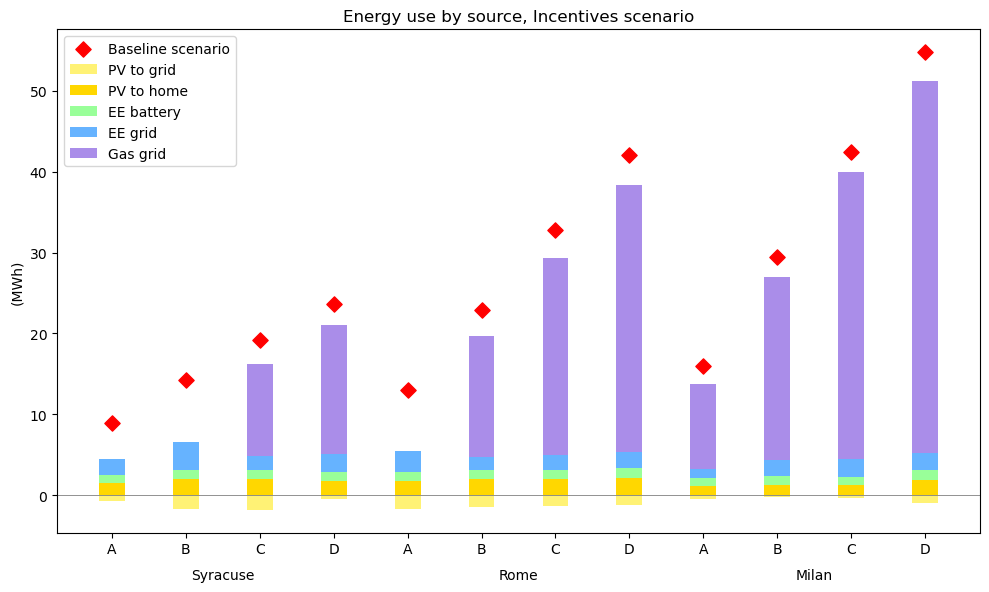

In [4]:
#Energy consumption incentive
x = np.arange(len(df_CO2_act['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax.bar(x, -inc_prod['PVsold']/1000, width, label='PV to grid', color='#FFF275')
rects2 = ax.bar(x, inc_prod['PVprod']/1000, width, label='PV to home', color='gold')
rects3 = ax.bar(x, inc_prod['Batt']/1000, width, bottom=inc_prod['PVprod']/1000, label='EE battery', color='#99ff99')
rects4 = ax.bar(x, inc_prod['Grid']/1000, width, bottom=(inc_prod['PVprod']+inc_prod['Batt'])/1000, label='EE grid', color='#66b3ff')
rects5 = ax.bar(x, inc_prod['gas']/1000, width, bottom=(inc_prod['PVprod']+inc_prod['Batt']+inc_prod['Grid'])/1000, label='Gas grid', color='#AA8DE9')

# Aggiungiamo le etichette per gli utenti
ax.set_xticks(x)
ax.set_xticklabels(df_CO2_act['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())
# Aggiungiamo una linea nera in corrispondenza di y=0
ax.axhline(0, color='gray', linewidth=0.6)

#Baseline dots
ax.scatter(x, (df_prod['Grid']+df_prod['gas'])/1000, color='red', marker='D',zorder=5, label='Baseline scenario', s=60)

# Aggiungiamo la legenda
ax.legend()
ax.set_ylabel('(MWh)')

# Titolo e layout
plt.title('Energy use by source, Incentives scenario')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

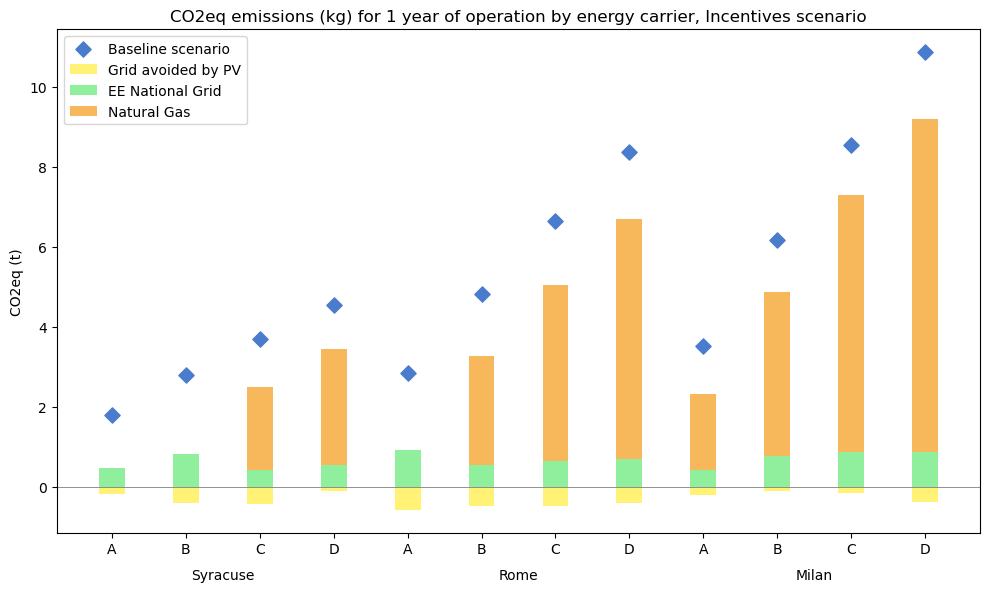

In [18]:
#Incentive CO2
x = np.arange(len(df_CO2_act['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax.bar(x, inc_CO2_act['PV']/1000, width, label='Grid avoided by PV', color='#FFF275')
rects2 = ax.bar(x, inc_CO2_act['EE']/1000, width, label='EE National Grid', color='#8FEF9D')
rects3 = ax.bar(x, inc_CO2_act['gas']/1000, width, bottom=inc_CO2_act['EE']/1000, label='Natural Gas', color='#F6B85A')

# Aggiungiamo le etichette per gli utenti
ax.set_xticks(x)
ax.set_xticklabels(df_CO2_act['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())
# Aggiungiamo una linea nera in corrispondenza di y=0
ax.axhline(0, color='gray', linewidth=0.6)

ax.scatter(x, (df_CO2_act['EE']+df_CO2_act['gas'])/1000, color='#4A7CCD', marker='D',zorder=5, label='Baseline scenario', s=60)

# Aggiungiamo la legenda
ax.legend()
ax.set_ylabel('CO2eq (t)')

# Titolo e layout
plt.title('CO2eq emissions (kg) for 1 year of operation by energy carrier, Incentives scenario')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

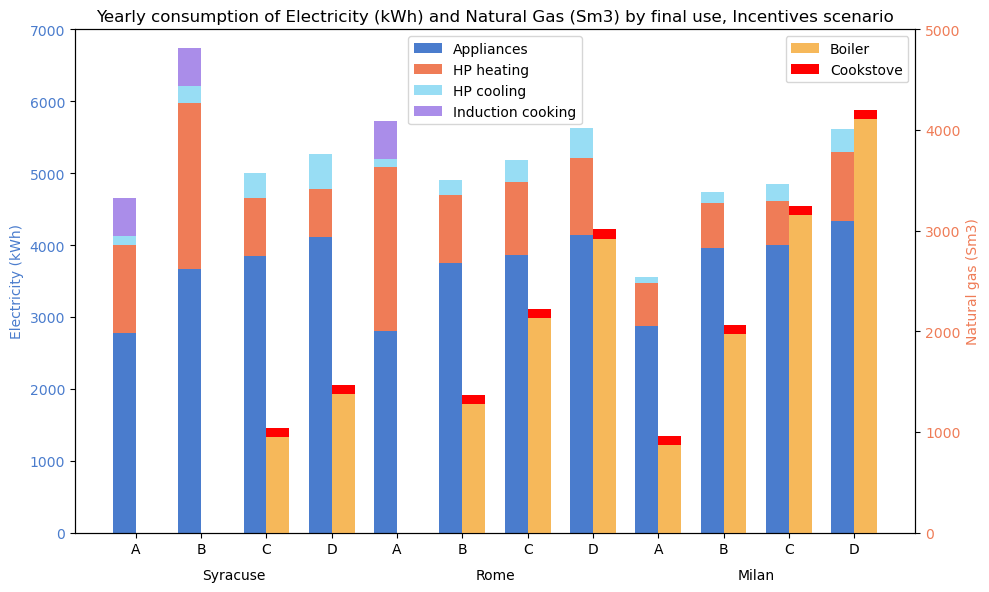

In [68]:
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))


# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x - width/2, inc_graph['YEE'], width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x - width/2, inc_graph['HPheat'], width, bottom=inc_graph['YEE'], label='HP heating', color='#EF7C57')
rects3 = ax1.bar(x - width/2, inc_graph['HPcool'], width, bottom=inc_graph['YEE']+inc_graph['HPheat'], label='HP cooling', color='#98DDF4')
rects4 = ax1.bar(x - width/2, inc_graph['Induc'], width, bottom=(inc_graph['YEE']+inc_graph['HPheat']+inc_graph['HPcool']), label='Induction cooking', color='#AA8DE9')
ax1.set_ylabel('Electricity (kWh)', color='#4A7CCD')
ax1.tick_params(axis='y', labelcolor='#4A7CCD')
ax1.set_ylim(0, 7000)

# Aggiungiamo le barre sovrapposte per il gas
ax2 = ax1.twinx()
rects4 = ax2.bar(x + width/2, inc_graph['Boiler'], width, label='Boiler', color='#F6B85A')
rects5 = ax2.bar(x + width/2, inc_graph['GasCooking'], width, bottom=inc_graph['Boiler'], label='Cookstove', color='red')
ax2.set_ylabel('Natural gas (Sm3)', color='#EF7C57')
ax2.tick_params(axis='y', labelcolor='#EF7C57')
ax2.set_ylim(0, 5000)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)
handles2, labels2 = ax2.get_legend_handles_labels()  # Otteniamo le barre di ax2 (gas)

# Creiamo una legenda combinata in ax1
ax1.legend(handles1, labels1, loc='upper center')
ax2.legend(handles2,labels2,loc='upper right')
# Titolo e layout
plt.title('Yearly consumption of Electricity (kWh) and Natural Gas (Sm3) by final use, Incentives scenario')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

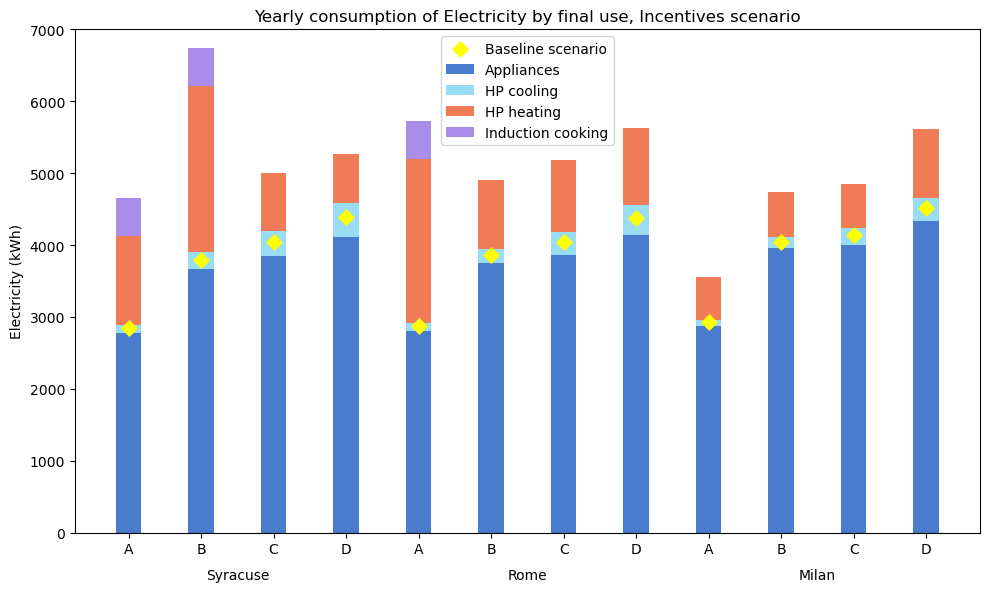

In [5]:
#Incentive EE
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x , inc_graph['YEE'], width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x, inc_graph['HPcool'], width, bottom=inc_graph['YEE'], label='HP cooling', color='#98DDF4')
rects3 = ax1.bar(x, inc_graph['HPheat'], width, bottom=inc_graph['YEE']+inc_graph['HPcool'], label='HP heating', color='#EF7C57')
rects4 = ax1.bar(x, inc_graph['Induc'], width, bottom=(inc_graph['YEE']+inc_graph['HPheat']+inc_graph['HPcool']), label='Induction cooking', color='#AA8DE9')
ax1.set_ylabel('Electricity (kWh)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 7000)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)
ax1.scatter(x, df_graph['YEE']+df_graph['AC'], color='yellow', marker='D',zorder=5, label='Baseline scenario', s=60)

# Creiamo una legenda combinata in ax1
#ax1.legend(handles=handles1, labels=labels1, loc='upper right')
ax1.legend()
# Titolo e layout
plt.title('Yearly consumption of Electricity by final use, Incentives scenario')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

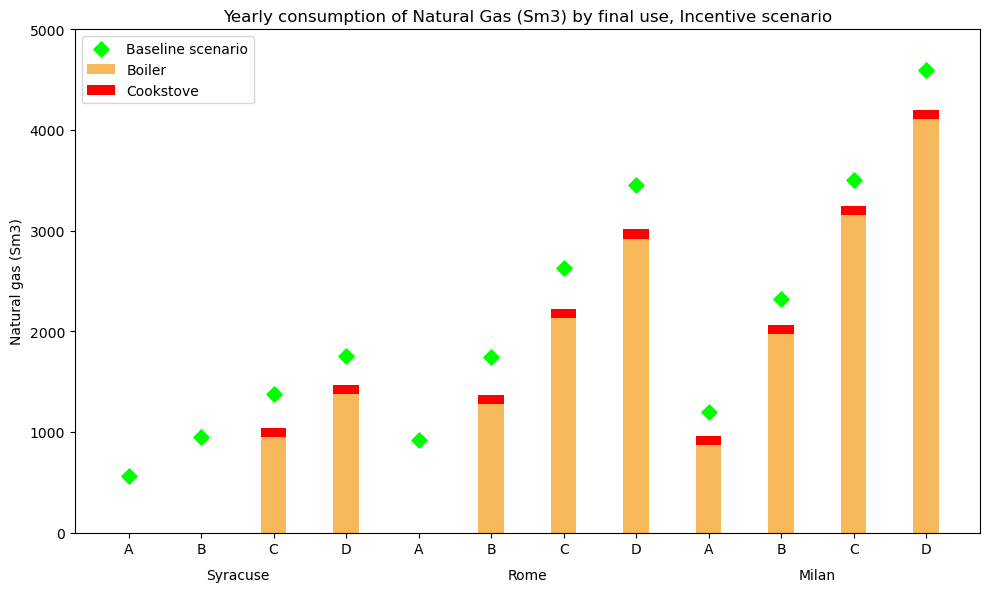

In [105]:
#Baseline NG
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per il gas
rects1 = ax1.bar(x, inc_graph['Boiler'], width, label='Boiler', color='#F6B85A')
rects2 = ax1.bar(x, inc_graph['GasCooking'], width, bottom=inc_graph['Boiler'], label='Cookstove', color='red')
ax1.set_ylabel('Natural gas (Sm3)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 5000)

ax1.scatter(x, df_graph['Boiler']+df_graph['Cooking'], color='lime', marker='D',zorder=5, label='Baseline scenario', s=60)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)

# Creiamo una legenda combinata in ax1
ax1.legend()

# Titolo e layout
plt.title('Yearly consumption of Natural Gas (Sm3) by final use, Incentive scenario')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

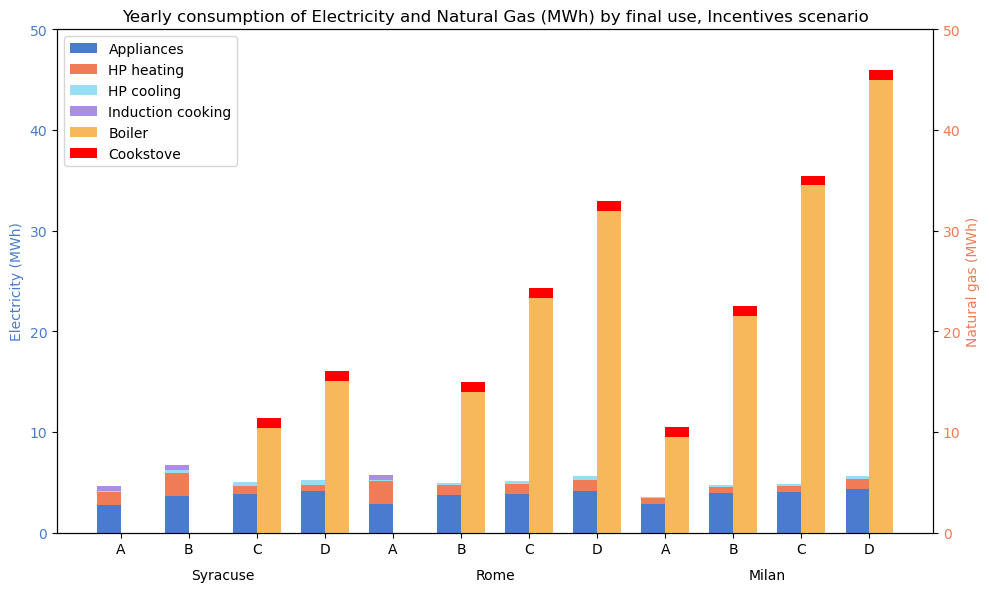

In [64]:
#Incentives, MWh
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))


# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x - width/2, inc_graph['YEE']/1000, width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x - width/2, inc_graph['HPheat']/1000, width, bottom=inc_graph['YEE']/1000, label='HP heating', color='#EF7C57')
rects3 = ax1.bar(x - width/2, inc_graph['HPcool']/1000, width, bottom=inc_graph['YEE']/1000+inc_graph['HPheat']/1000, label='HP cooling', color='#98DDF4')
rects4 = ax1.bar(x - width/2, inc_graph['Induc']/1000, width, bottom=(inc_graph['YEE']+inc_graph['HPheat']+inc_graph['HPcool'])/1000, label='Induction cooking', color='#AA8DE9')
ax1.set_ylabel('Electricity (MWh)', color='#4A7CCD')
ax1.tick_params(axis='y', labelcolor='#4A7CCD')
ax1.set_ylim(0, 50)

# Aggiungiamo le barre sovrapposte per il gas
ax2 = ax1.twinx()
rects4 = ax2.bar(x + width/2, inc_graph['Boiler']*10.944/1000, width, label='Boiler', color='#F6B85A')
rects5 = ax2.bar(x + width/2, inc_graph['GasCooking']*10.944/1000, width, bottom=inc_graph['Boiler']*10.944/1000, label='Cookstove', color='red')
ax2.set_ylabel('Natural gas (MWh)', color='#EF7C57')
ax2.tick_params(axis='y', labelcolor='#EF7C57')
ax2.set_ylim(0, 50)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)
handles2, labels2 = ax2.get_legend_handles_labels()  # Otteniamo le barre di ax2 (gas)

# Creiamo una legenda combinata in ax1
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')

# Titolo e layout
plt.title('Yearly consumption of Electricity and Natural Gas (MWh) by final use, Incentives scenario')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

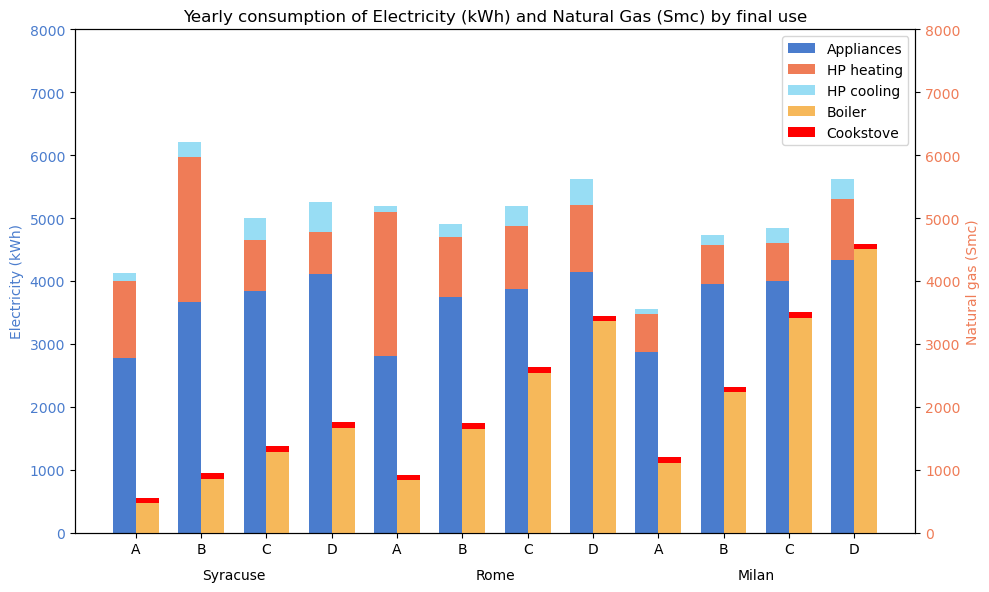

In [32]:
#Baseline
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x - width/2, inc_graph['YEE'], width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x - width/2, inc_graph['HPheat'], width, bottom=inc_graph['YEE'], label='HP heating', color='#EF7C57')
rects3 = ax1.bar(x - width/2, inc_graph['HPcool'], width, bottom=inc_graph['YEE']+inc_graph['HPheat'], label='HP cooling', color='#98DDF4')
ax1.set_ylabel('Electricity (kWh)', color='#4A7CCD')
ax1.tick_params(axis='y', labelcolor='#4A7CCD')
ax1.set_ylim(0, 8000)

# Aggiungiamo le barre sovrapposte per il gas
ax2 = ax1.twinx()
rects4 = ax2.bar(x + width/2, df_graph['Boiler'], width, label='Boiler', color='#F6B85A')
rects5 = ax2.bar(x + width/2, df_graph['Cooking'], width, bottom=df_graph['Boiler'], label='Cookstove', color='red')
ax2.set_ylabel('Natural gas (Smc)', color='#EF7C57')
ax2.tick_params(axis='y', labelcolor='#EF7C57')
ax2.set_ylim(0, 8000)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)
handles2, labels2 = ax2.get_legend_handles_labels()  # Otteniamo le barre di ax2 (gas)

# Creiamo una legenda combinata in ax1
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper right')

# Titolo e layout
plt.title('Yearly consumption of Electricity (kWh) and Natural Gas (Smc) by final use')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

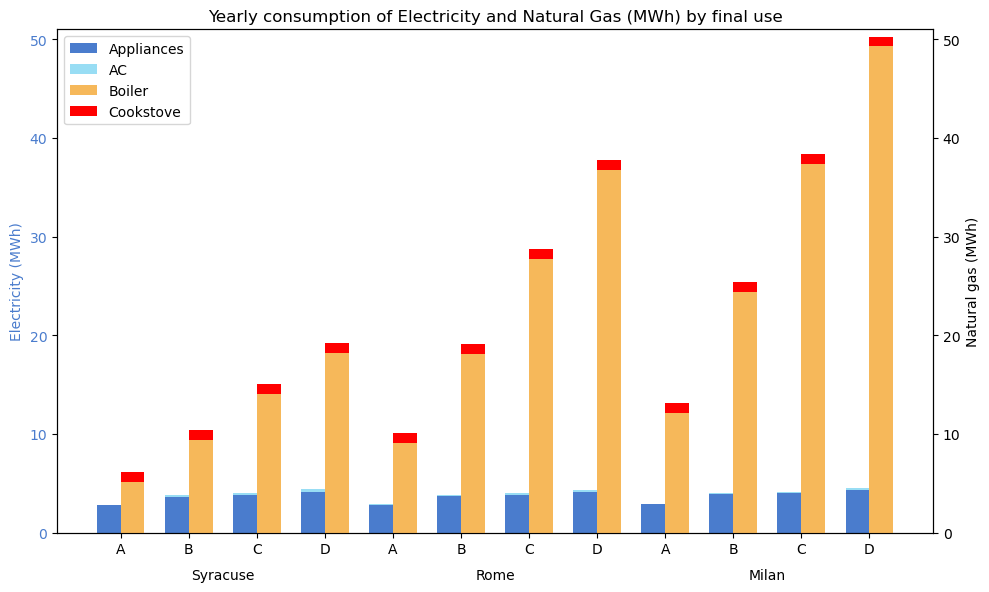

In [77]:
#Baseline
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))


# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x - width/2, df_graph['YEE']/1000, width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x - width/2, df_graph['AC']/1000, width, bottom=df_graph['YEE']/1000, label='AC', color='#98DDF4')
ax1.set_ylabel('Electricity (MWh)', color='#4A7CCD')
ax1.tick_params(axis='y', labelcolor='#4A7CCD')
ax1.set_ylim(0, 51)

# Aggiungiamo le barre sovrapposte per il gas
ax2 = ax1.twinx()
rects4 = ax2.bar(x + width/2, df_graph['Boiler']*10.944/1000, width, label='Boiler', color='#F6B85A')
rects5 = ax2.bar(x + width/2, df_graph['Cooking']*10.944/1000, width, bottom=df_graph['Boiler']*10.944/1000, label='Cookstove', color='red')
ax2.set_ylabel('Natural gas (MWh)', color='#EF7C57')
ax2.tick_params(axis='y', labelcolor='#EF7C57')
ax2.set_ylim(0, 51)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)
handles2, labels2 = ax2.get_legend_handles_labels()  # Otteniamo le barre di ax2 (gas)

# Creiamo una legenda combinata in ax1
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')

# Titolo e layout
plt.title('Yearly consumption of Electricity and Natural Gas (MWh) by final use')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

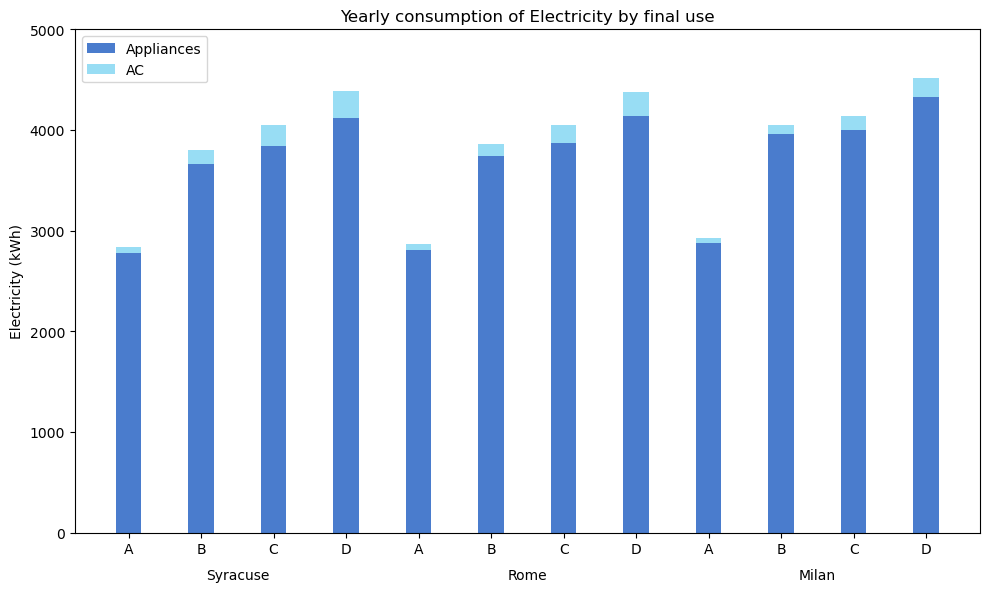

In [78]:
#Baseline EE
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax1.bar(x, df_graph['YEE'], width, label='Appliances', color='#4A7CCD')
rects2 = ax1.bar(x, df_graph['AC'], width, bottom=df_graph['YEE'], label='AC', color='#98DDF4')
ax1.set_ylabel('Electricity (kWh)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 5000)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)

# Creiamo una legenda combinata in ax1
ax1.legend(handles=handles1, labels=labels1, loc='upper left')

# Titolo e layout
plt.title('Yearly consumption of Electricity by final use')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

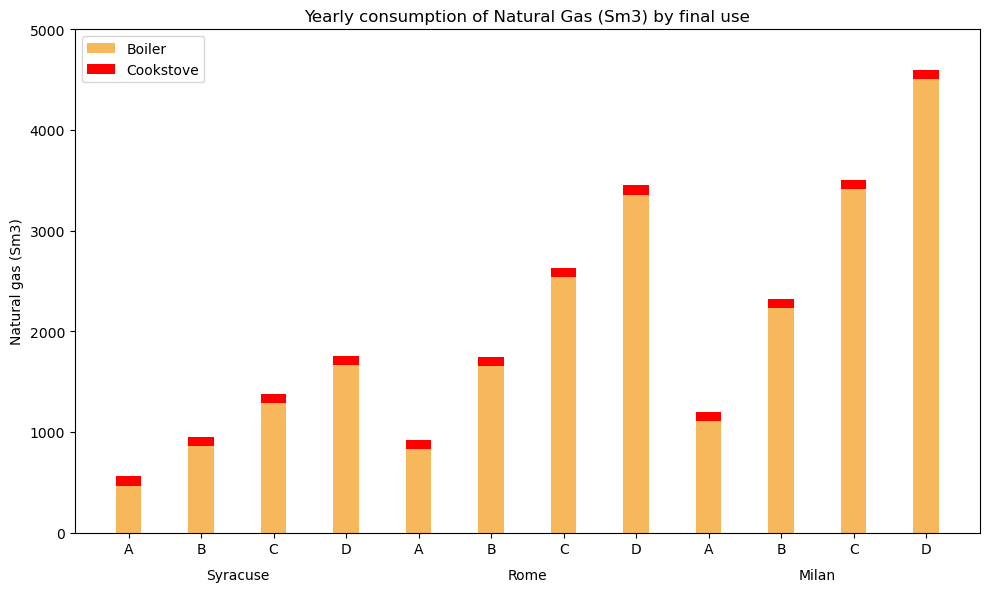

In [79]:
#Baseline NG
#Definiamo la posizione delle barre
x = np.arange(len(df_graph['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per il gas
rects1 = ax1.bar(x, df_graph['Boiler'], width, label='Boiler', color='#F6B85A')
rects2 = ax1.bar(x, df_graph['Cooking'], width, bottom=df_graph['Boiler'], label='Cookstove', color='red')
ax1.set_ylabel('Natural gas (Sm3)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 5000)

# Aggiungiamo le etichette per gli utenti
ax1.set_xticks(x)
ax1.set_xticklabels(df_graph['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax1.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax1.get_xaxis_transform())
# Aggiungiamo la legenda
handles1, labels1 = ax1.get_legend_handles_labels()  # Otteniamo le barre di ax1 (elettricità)

# Creiamo una legenda combinata in ax1
ax1.legend(handles=handles1, labels=labels1, loc='upper left')

# Titolo e layout
plt.title('Yearly consumption of Natural Gas (Sm3) by final use')
fig.tight_layout()

# Mostriamo il grafico
plt.show()

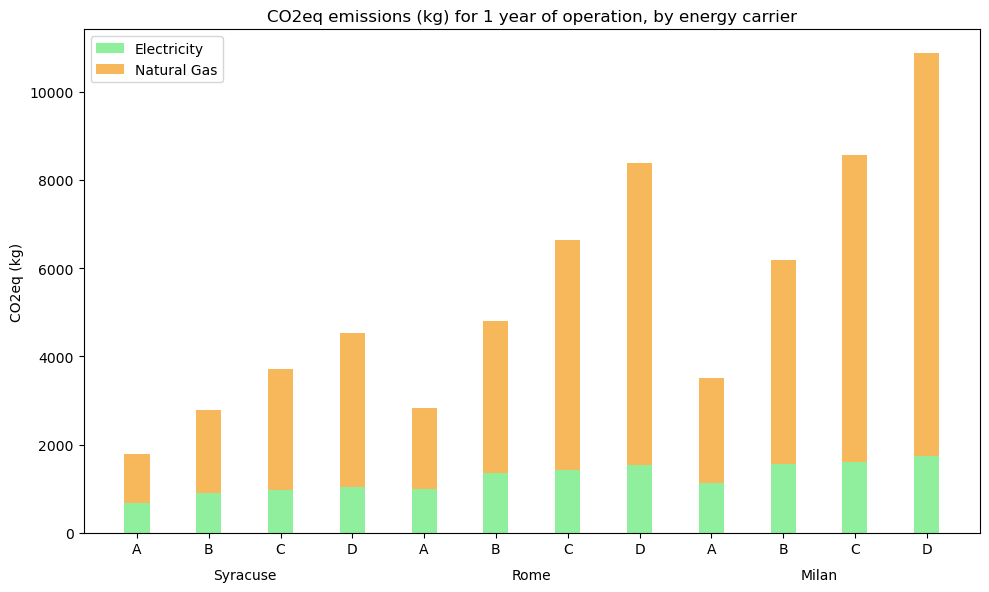

In [86]:
# Definiamo la posizione delle barre
x = np.arange(len(df_CO2_act['users']))  # Posizioni per ogni utente
width = 0.35  # Larghezza delle barre

# Creiamo il grafico
fig, ax = plt.subplots(figsize=(10, 6))

# Aggiungiamo le barre sovrapposte per l'elettricità
rects1 = ax.bar(x, df_CO2_act['EE'], width, label='Electricity', color='#8FEF9D')
rects2 = ax.bar(x, df_CO2_act['gas'], width, bottom=df_CO2_act['EE'], label='Natural Gas', color='#F6B85A')

# Aggiungiamo le etichette per gli utenti
ax.set_xticks(x)
ax.set_xticklabels(df_CO2_act['users'])

# Aggiungiamo le etichette delle città sotto le colonne
cities = ['Syracuse'] * 4 + ['Rome'] * 4 + ['Milan'] * 4
city_positions = [1.5, 5.5, 9.5]  # Posizioni medie per i gruppi di utenti di ogni città
city_labels = ['Syracuse', 'Rome', 'Milan']

# Aggiungiamo i nomi delle città sotto l'asse
for i, city in enumerate(city_labels):
    ax.text(city_positions[i], -0.07, city, ha='center', va='top', transform=ax.get_xaxis_transform())


# Aggiungiamo la legenda
ax.legend()
ax.set_ylabel('CO2eq (kg)')

# Titolo e layout
plt.title('CO2eq emissions (kg) for 1 year of operation, by energy carrier')
fig.tight_layout()

# Mostriamo il grafico
plt.show()